In [4]:
import pandas as pd

## Lendo o dataset

In [41]:
raw_dataset = pd.read_csv('dataset.csv')

In [42]:
raw_dataset.head()

,nome,capacidade_ram,capacidade_armazenamento,preco
0,Samsung Galaxy S21 Ultra,12 GB,256 GB,6899.0
1,Samsung Galaxy S21+,8 GB,256 GB,4799.0
2,Samsung Galaxy S20 FE,6 GB,128 GB,2199.0
3,Samsung Galaxy A52,8 GB,128 GB,1699.0
4,Samsung Galaxy A32,4 GB,128 GB,1199.0


## Análise dos Dados

In [43]:
raw_dataset.count()

nome                        147
capacidade_ram              147
capacidade_armazenamento    147
preco                       147
dtype: int64

In [44]:
raw_dataset['nome'].unique()

array(['Samsung Galaxy S21 Ultra', 'Samsung Galaxy S21+',
       'Samsung Galaxy S20 FE', 'Samsung Galaxy A52',
       'Samsung Galaxy A32', 'Apple iPhone 12 Pro Max', 'Apple iPhone 12',
       'Apple iPhone SE (2020)', 'Xiaomi Redmi Note 10 Pro',
       'Xiaomi Redmi 9', 'Motorola Moto G30', 'Motorola Moto G9 Power',
       'OnePlus 9 Pro', 'OnePlus 9', 'Huawei P30 Lite', 'Huawei P40 Pro',
       'Google Pixel 5', 'Google Pixel 4a', 'Sony Xperia 5 II',
       'Sony Xperia 10 II', 'Nokia 5.4', 'Nokia 8.3 5G', 'LG K42',
       'LG K22+', 'Asus Zenfone 7', 'Asus Zenfone 6', 'Motorola Moto E6s',
       'Motorola Moto G10', 'Samsung Galaxy A12', 'Samsung Galaxy A72',
       'Samsung Galaxy M51', 'Xiaomi Redmi Note 9S', 'Xiaomi Poco X3 NFC',
       'Xiaomi Redmi Note 10S', 'Xiaomi Mi 11', 'OnePlus Nord',
       'OnePlus 8T', 'Realme 7', 'Realme 7 Pro', 'Realme C15',
       'Realme C11', 'Realme 7 5G', 'Motorola Moto G8 Plus',
       'Samsung Galaxy A70', 'Motorola Moto G9 Play',
       'Sam

## Verificação de repetições no nome do aparelho

In [45]:
len(raw_dataset['nome'].unique())

116

## Observações sobre repetições

In [46]:
len(raw_dataset[['nome', 'capacidade_ram', 'capacidade_armazenamento']].value_counts())

131

In [47]:
print('Quantidade de configurações de memória RAM diferentes: {0}'.
      format(len(raw_dataset['capacidade_ram'].unique())))

print('Quantidade de configurações de armazenamento persistente diferentes: {0}'.
      format(len(raw_dataset['capacidade_armazenamento'].unique())))

Quantidade de configurações de memória RAM diferentes: 11
Quantidade de configurações de armazenamento persistente diferentes: 8


In [48]:
raw_dataset['capacidade_ram'].unique()

array(['12 GB', '8 GB', '6 GB', '4 GB', '3 GB', '2 GB', '8', '4', '6',
       '2', '3'], dtype=object)

In [49]:
raw_dataset['capacidade_armazenamento'].unique()

array(['256 GB', '128 GB', '64 GB', '32 GB', '128', '64', '32', '256'],
      dtype=object)

## Tratamento dos Dados

In [54]:
raw_dataset['chave_unica'] = raw_dataset['nome'] + "_" + raw_dataset['capacidade_ram'] + "_" + raw_dataset['capacidade_armazenamento']

In [55]:
raw_dataset

,nome,capacidade_ram,capacidade_armazenamento,preco,chave_unica
0,Samsung Galaxy S21 Ultra,12 GB,256 GB,6899.0,Samsung Galaxy S21 Ultra_12 GB_256 GB
1,Samsung Galaxy S21+,8 GB,256 GB,4799.0,Samsung Galaxy S21+_8 GB_256 GB
2,Samsung Galaxy S20 FE,6 GB,128 GB,2199.0,Samsung Galaxy S20 FE_6 GB_128 GB
3,Samsung Galaxy A52,8 GB,128 GB,1699.0,Samsung Galaxy A52_8 GB_128 GB
4,Samsung Galaxy A32,4 GB,128 GB,1199.0,Samsung Galaxy A32_4 GB_128 GB
...,...,...,...,...,...
142,Samsung Galaxy A70s,6,128,2299.0,Samsung Galaxy A70s_6_128
143,Xiaomi Redmi Note 9S,4,128,1599.0,Xiaomi Redmi Note 9S_4_128
144,Asus Zenfone 4,4,64,1499.0,Asus Zenfone 4_4_64
145,Motorola Moto E5 Plus,3,32,799.0,Motorola Moto E5 Plus_3_32


In [56]:
len(raw_dataset['chave_unica'].unique())

131

In [75]:
cleared_dataset = raw_dataset.drop_duplicates('chave_unica').copy()

In [76]:
cleared_dataset.count()

nome                        131
capacidade_ram              131
capacidade_armazenamento    131
preco                       131
chave_unica                 131
dtype: int64

In [82]:
cleared_dataset['capacidade_ram'] = cleared_dataset['capacidade_ram'].apply(lambda x: str(x).replace('GB', '').strip()).astype('int32')
cleared_dataset['capacidade_armazenamento'] = cleared_dataset['capacidade_armazenamento'].apply(lambda x: str(x).replace('GB', '').strip()).astype('int32')

In [83]:
cleared_dataset['capacidade_ram'].unique()

array([12,  8,  6,  4,  3,  2], dtype=int32)

In [84]:
cleared_dataset['capacidade_armazenamento'].unique()

array([256, 128,  64,  32], dtype=int32)

In [85]:
cleared_dataset.describe()

,capacidade_ram,capacidade_armazenamento,preco
count,131.000000,131.000000,131.000000
mean,4.732824,98.687023,1826.938931
std,2.067419,54.427239,1521.519341
min,2.000000,32.000000,549.000000
25%,4.000000,64.000000,999.000000
50%,4.000000,128.000000,1399.000000
75%,6.000000,128.000000,1799.000000
max,12.000000,256.000000,9999.000000


## Clusterização

In [87]:
from sklearn.cluster import KMeans
import numpy as np

In [97]:
X = cleared_dataset['preco'].to_numpy().reshape(-1, 1)

In [109]:
number_of_clusters = 3

In [110]:
kmeans = KMeans(n_clusters=number_of_clusters, random_state=0, n_init="auto").fit(X)

In [111]:
cleared_dataset['group'] = kmeans.labels_

In [112]:
cleared_dataset

,nome,capacidade_ram,capacidade_armazenamento,preco,chave_unica,group
0,Samsung Galaxy S21 Ultra,12,256,6899.0,Samsung Galaxy S21 Ultra_12 GB_256 GB,1
1,Samsung Galaxy S21+,8,256,4799.0,Samsung Galaxy S21+_8 GB_256 GB,2
2,Samsung Galaxy S20 FE,6,128,2199.0,Samsung Galaxy S20 FE_6 GB_128 GB,0
3,Samsung Galaxy A52,8,128,1699.0,Samsung Galaxy A52_8 GB_128 GB,0
4,Samsung Galaxy A32,4,128,1199.0,Samsung Galaxy A32_4 GB_128 GB,0
...,...,...,...,...,...,...
140,Motorola Moto G5S,3,32,899.0,Motorola Moto G5S_3_32,0
141,Nokia 6.2,4,64,1299.0,Nokia 6.2_4_64,0
142,Samsung Galaxy A70s,6,128,2299.0,Samsung Galaxy A70s_6_128,0
144,Asus Zenfone 4,4,64,1499.0,Asus Zenfone 4_4_64,0


In [120]:
from IPython.display import display

## Análise dos Grupos

In [121]:
for i in range(0, number_of_clusters):
    cluster_dataset = cleared_dataset[cleared_dataset['group'] == i]
    print('Aparelhos no grupo {0}:'.format(i))
    display(cluster_dataset)

Aparelhos no grupo 0:


,nome,capacidade_ram,capacidade_armazenamento,preco,chave_unica,group
2,Samsung Galaxy S20 FE,6,128,2199.0,Samsung Galaxy S20 FE_6 GB_128 GB,0
3,Samsung Galaxy A52,8,128,1699.0,Samsung Galaxy A52_8 GB_128 GB,0
4,Samsung Galaxy A32,4,128,1199.0,Samsung Galaxy A32_4 GB_128 GB,0
8,Xiaomi Redmi Note 10 Pro,6,128,1899.0,Xiaomi Redmi Note 10 Pro_6 GB_128 GB,0
9,Xiaomi Redmi 9,4,64,1199.0,Xiaomi Redmi 9_4 GB_64 GB,0
...,...,...,...,...,...,...
140,Motorola Moto G5S,3,32,899.0,Motorola Moto G5S_3_32,0
141,Nokia 6.2,4,64,1299.0,Nokia 6.2_4_64,0
142,Samsung Galaxy A70s,6,128,2299.0,Samsung Galaxy A70s_6_128,0
144,Asus Zenfone 4,4,64,1499.0,Asus Zenfone 4_4_64,0


Aparelhos no grupo 1:


,nome,capacidade_ram,capacidade_armazenamento,preco,chave_unica,group
0,Samsung Galaxy S21 Ultra,12,256,6899.0,Samsung Galaxy S21 Ultra_12 GB_256 GB,1
5,Apple iPhone 12 Pro Max,6,128,9999.0,Apple iPhone 12 Pro Max_6 GB_128 GB,1
6,Apple iPhone 12,4,128,6999.0,Apple iPhone 12_4 GB_128 GB,1
12,OnePlus 9 Pro,12,256,7899.0,OnePlus 9 Pro_12 GB_256 GB,1
15,Huawei P40 Pro,8,256,6999.0,Huawei P40 Pro_8 GB_256 GB,1


Aparelhos no grupo 2:


,nome,capacidade_ram,capacidade_armazenamento,preco,chave_unica,group
1,Samsung Galaxy S21+,8,256,4799.0,Samsung Galaxy S21+_8 GB_256 GB,2
7,Apple iPhone SE (2020),3,64,2999.0,Apple iPhone SE (2020)_3 GB_64 GB,2
13,OnePlus 9,8,128,4899.0,OnePlus 9_8 GB_128 GB,2
16,Google Pixel 5,8,128,5399.0,Google Pixel 5_8 GB_128 GB,2
18,Sony Xperia 5 II,8,128,4699.0,Sony Xperia 5 II_8 GB_128 GB,2
21,Nokia 8.3 5G,6,64,2999.0,Nokia 8.3 5G_6 GB_64 GB,2
24,Asus Zenfone 7,8,128,3799.0,Asus Zenfone 7_8 GB_128 GB,2
29,Samsung Galaxy A72,8,256,3299.0,Samsung Galaxy A72_8 GB_256 GB,2
34,Xiaomi Mi 11,8,128,4499.0,Xiaomi Mi 11_8 GB_128 GB,2
35,OnePlus Nord,12,256,3499.0,OnePlus Nord_12 GB_256 GB,2


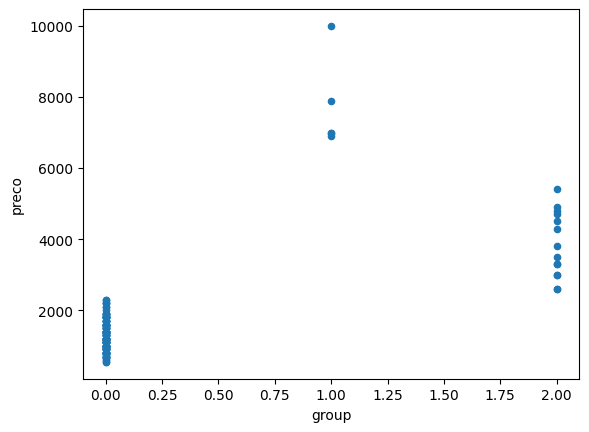

In [136]:
_= cleared_dataset.plot.scatter(x='group', y='preco')

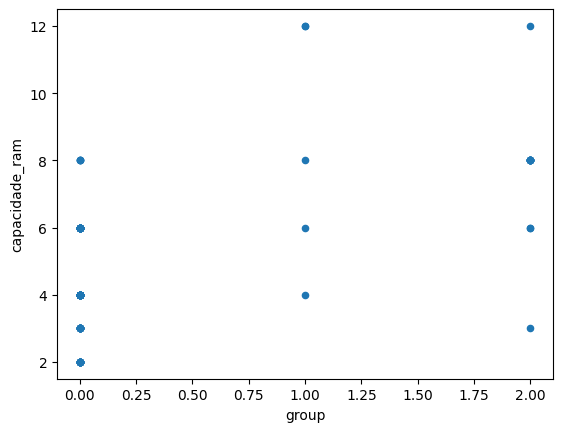

In [137]:
_= cleared_dataset.plot.scatter(x='group', y='capacidade_ram')

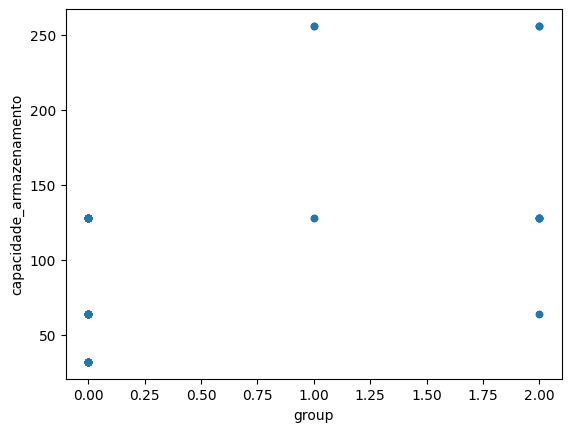

In [138]:
_= cleared_dataset.plot.scatter(x='group', y='capacidade_armazenamento')